In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Leer archivo CSV
dataset = pd.read_csv('C:/Users/user/Desktop/Practica Python/CBC data_for_meandeley_csv_01052023.csv')

dataset.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,1,28,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,2,41,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,3,40,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,4,76,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,5,20,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [3]:
# Crear una copia del dataset original
dataset_copy_RL = dataset.copy()

In [4]:
# Ver las columnas principales (nombres de las columnas)
print(dataset_copy_RL.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB'],
      dtype='object')


In [15]:
# Definir las columnas de características
columns_to_use_RL = ['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']
data = dataset_copy_RL[columns_to_use_RL]

In [16]:
# Ver las primeras filas del dataset
print(dataset_copy_RL.head())

   S. No.  Age  Sex   RBC   PCV   MCV   MCH  MCHC   RDW    TLC  PLT /mm3   HGB
0       1   28    0  5.66  34.0  60.1  17.0  28.2  20.0  11.10     128.3   9.6
1       2   41    0  4.78  44.5  93.1  28.9  31.0  13.0   7.02     419.0  13.8
2       3   40    1  4.65  41.6  89.5  28.8  32.2  13.0   8.09     325.0  13.4
3       4   76    0  4.24  36.7  86.6  26.7  30.8  14.9  13.41     264.0  11.3
4       5   20    1  4.14  36.9  89.1  27.8  31.2  13.2   4.75     196.0  11.5


In [17]:
# Ver la información general del dataset
print(dataset_copy_RL.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S. No.    364 non-null    int64  
 1   Age       364 non-null    int64  
 2   Sex       364 non-null    int64  
 3   RBC       364 non-null    float64
 4   PCV       364 non-null    float64
 5   MCV       364 non-null    float64
 6   MCH       364 non-null    float64
 7   MCHC      364 non-null    float64
 8   RDW       364 non-null    float64
 9   TLC       364 non-null    float64
 10  PLT /mm3  364 non-null    float64
 11  HGB       364 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 34.3 KB
None


In [18]:
# Resumen estadístico del dataset
print(dataset_copy_RL.describe())

           S. No.         Age         Sex         RBC         PCV         MCV  \
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000   
mean   182.500000   44.917582    0.442308    4.278736   36.762912   87.509121   
std    105.221988   18.780854    0.497344    0.820166    6.830835    9.332164   
min      1.000000   11.000000    0.000000    1.360000   13.100000   55.700000   
25%     91.750000   28.000000    0.000000    3.780000   32.900000   83.175000   
50%    182.500000   44.500000    0.000000    4.335000   36.800000   87.950000   
75%    273.250000   60.000000    1.000000    4.800000   41.850000   91.875000   
max    364.000000   89.000000    1.000000    6.900000   56.900000  124.100000   

              MCH        MCHC         RDW         TLC    PLT /mm3         HGB  
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000  
mean    28.227143   32.053407   15.116511    8.863571  223.750824   11.907692  
std      3.865998    2.801790 

In [19]:
# Ver las columnas principales (nombres de las columnas)
print(dataset_copy_RL.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB'],
      dtype='object')


In [20]:
# Verificar valores nulos
print(dataset_copy_RL.isnull().sum())

S. No.      0
Age         0
Sex         0
RBC         0
PCV         0
MCV         0
MCH         0
MCHC        0
RDW         0
TLC         0
PLT /mm3    0
HGB         0
dtype: int64


In [21]:
# Definir la variable dependiente (HGB) y las variables independientes
X = data.drop('HGB', axis=1)  # Variables independientes
y = data['HGB']               # Variable dependiente

In [22]:
# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [25]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [27]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.1978603076002188
R-squared: 0.9630860736711248


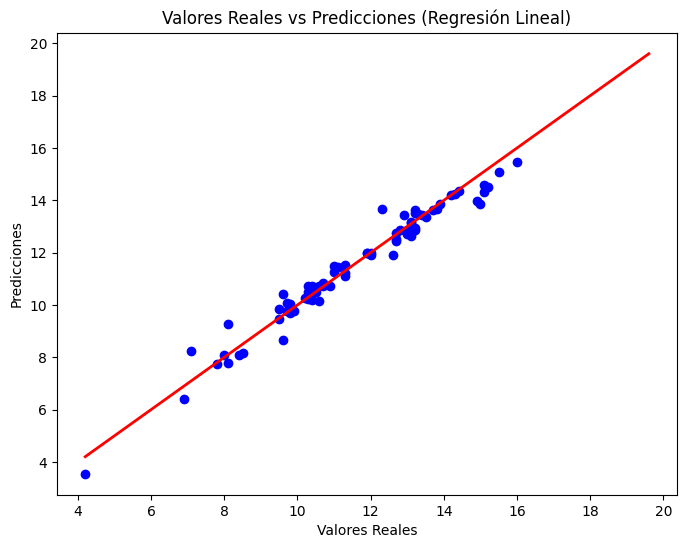

In [28]:
# Crear un gráfico de dispersión para comparar las predicciones con los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones (Regresión Lineal)')
plt.show()

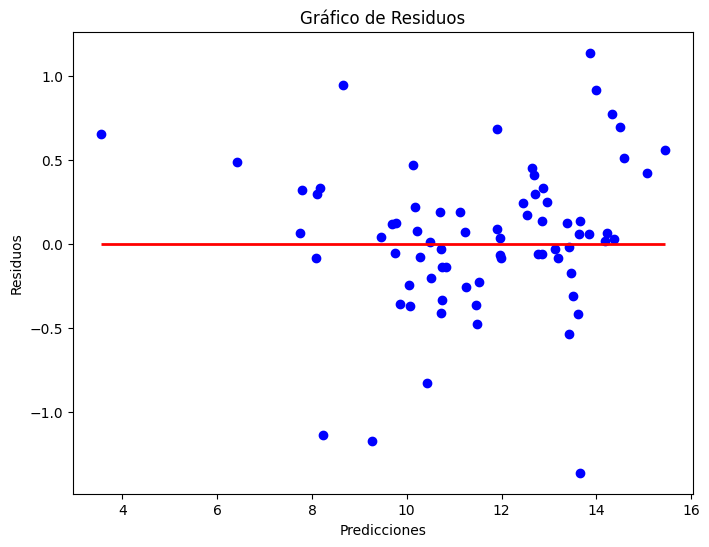

In [29]:
# Gráfico de los residuos
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(0, y_pred.min(), y_pred.max(), color='red', lw=2)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

In [32]:
# Calcular VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


    Variable        VIF
0     S. No.   1.126714
1        Age   1.143305
2        Sex   1.276971
3        RBC   7.805585
4        PCV   7.263489
5        MCV   9.303572
6        MCH  14.404545
7       MCHC   5.945442
8        RDW   1.364246
9        TLC   1.202923
10  PLT /mm3   1.118974


In [33]:
# Crear un DataFrame con los resultados reales y predichos
results = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})

# Mostrar los primeros 10 resultados como tabla
print(results.head(10))

     Real   Predicho
193   9.5   9.458744
33   10.3  10.713469
15   14.3  14.234572
347  13.1  12.649479
57   11.0  11.479464
183  12.6  11.915353
76   12.3  13.662947
119  13.7  13.645109
152   9.6   8.654116
126  13.5  13.376718


<Figure size 1000x600 with 0 Axes>

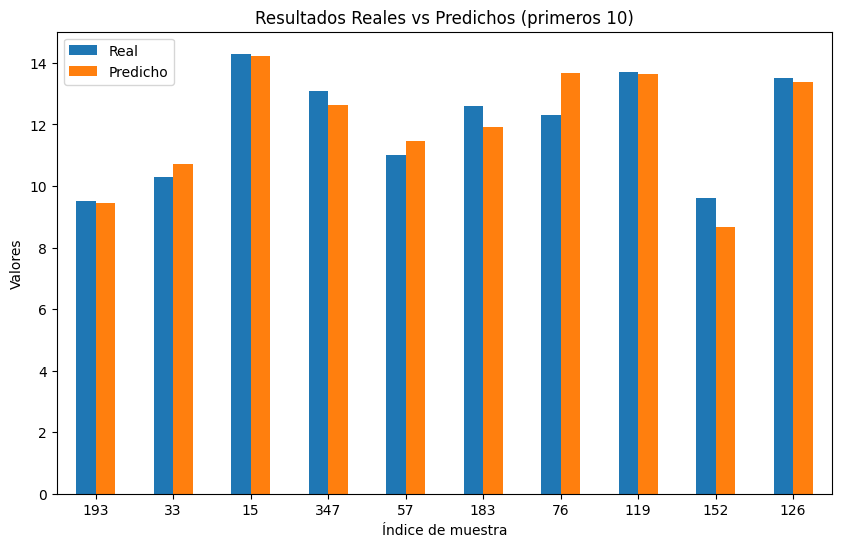

In [34]:
# Graficar los resultados reales vs predichos en una gráfica de barras
plt.figure(figsize=(10, 6))
results.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Resultados Reales vs Predichos (primeros 10)')
plt.ylabel('Valores')
plt.xlabel('Índice de muestra')
plt.xticks(rotation=0)
plt.show()

In [35]:
# Calcular los errores absolutos
results['Error Absoluto'] = abs(results['Real'] - results['Predicho'])

# Mostrar la tabla con los errores
print(results.head(10))

     Real   Predicho  Error Absoluto
193   9.5   9.458744        0.041256
33   10.3  10.713469        0.413469
15   14.3  14.234572        0.065428
347  13.1  12.649479        0.450521
57   11.0  11.479464        0.479464
183  12.6  11.915353        0.684647
76   12.3  13.662947        1.362947
119  13.7  13.645109        0.054891
152   9.6   8.654116        0.945884
126  13.5  13.376718        0.123282


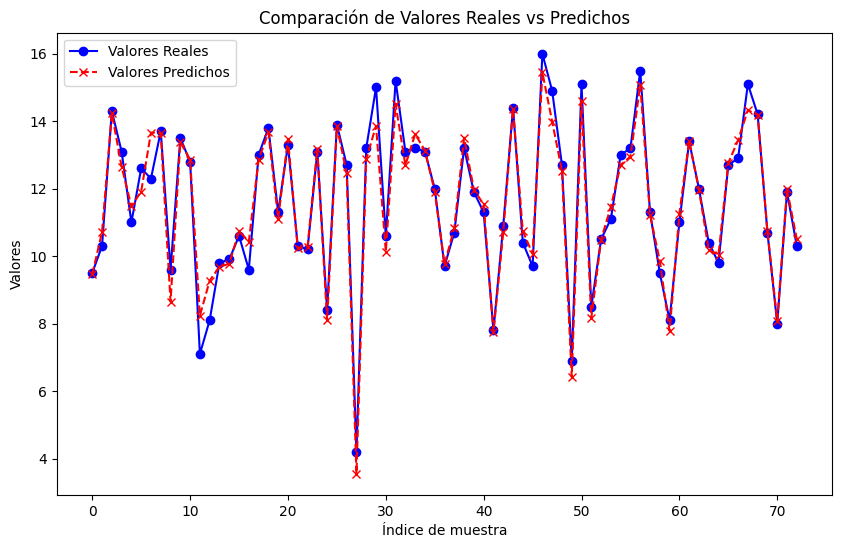

In [36]:
# Gráfico de líneas para comparar los valores reales y predichos
plt.figure(figsize=(10, 6))
plt.plot(results['Real'].values, label='Valores Reales', color='blue', linestyle='-', marker='o')
plt.plot(results['Predicho'].values, label='Valores Predichos', color='red', linestyle='--', marker='x')
plt.title('Comparación de Valores Reales vs Predichos')
plt.xlabel('Índice de muestra')
plt.ylabel('Valores')
plt.legend()
plt.show()